In [1]:
%matplotlib inline
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import re
import os.path
from scipy.spatial import distance

In [2]:
'''
    preprocess the dataset
    if preprocessed data exist(new_data_1),read in new_data_1;
    otherwise read and prepocess the adult.data.txt
'''

# dimension of each example in the dataset
d = 15
# k is the top pricipal calculated by the eigenvectors, right now just fix it
k = 5
# preprocess the data
data_set = []
data_set_done = []
if os.path.exists('new_data_1'):
    print "reading in existing file"
    with open('new_data_1') as data:
        for line in data:
            data_set_done.append(map(float, line.split()))
else:
    with open('adult.data.txt') as data:
        for line in data:
            # '\s' matches whitespace
            tmp = re.sub(r'\s', '', line).split(',')
            data_set.append(tmp)
    #print data_set
    feature_vector_size = len(data_set[0])
    print "feature vector is  " ,feature_vector_size
    print "data set size is ", len(data_set)
    tmp = data_set[0]
    
    # find out which feature is not a digit
    non_digit_index = []
    for i in range (0,feature_vector_size):
        if tmp[i].isdigit():
            continue
        else:
            non_digit_index.append(i)
    print non_digit_index

    modified_data_set= []
    for item in data_set:
        modified_data_set.append(item)
        
    print "data before processed dimension is ", len(modified_data_set[0])
    item_list = []
    count = 0
    dimension_to_increase = 0
    # for all the non_digit index, count how many differnt items
    for i in non_digit_index:
        # clear the item list to find different string for same feature
        items = []
        # loop through the whole data set
        for vector in data_set:
            # get the corresponsding item
            tmp = vector[i]
            # it already in the list
            if tmp in items:
                continue
            else:
                # otherwise append to the list
                items.append(tmp)
        dimension_to_increase = dimension_to_increase + len(items)-1
        # loop through the whole data set to replace the feature
        for j in range(len(modified_data_set)):
            v = modified_data_set[j]
            # get the item in the vector
            tmp = v[i+count]
            index  = items.index(tmp)
            front = v[0:i+count]
            end = v[i+1+count:len(v)]
            zeros = [0]*len(items)
            zeros[index] = 1
            front.extend(zeros)
            front.extend(end)
            modified_data_set[j] = front
            #v[i] = float(index)
        count = count + len(items)-1
    for v in modified_data_set:
        v = map(float, v)
        data_set_done.append(v)
    print "dimension to increase ", dimension_to_increase
    print "data processed dimension is ", len(data_set_done[0])
    #print data_set_done
    print "size of data set done is ", len(data_set_done)

    # write to new data 1 
    f = open('new_data_1', 'w')
    for vector in data_set_done:
        for num in vector:
            f.write(str(num)+" ")
        f.write("\n")
    f.close()
    print "reading data set done"

reading in existing file


In [3]:
'''
    helper function to normalize a vector
    v = np.array([[x1,x2]])
    row-major vectors
'''
def normalizeVector(v):
    distance = 0.0
    for i in v:
        for j in i:
            distance = distance + j**2
    distance = math.sqrt(distance)
    v = v/distance
    return v

# helper function to calculate the distance between two vectors
# v1 = np.array([[x1,x2]])
# v2 = np.array([[x1,x2]])
def distance(v1,v2):
    distance = 0.0
    for i,j in zip(v1,v2):
        for x, y in zip(i, j):
            distance = distance + (x- y)**2
    distance = math.sqrt(distance)
    return distance

In [4]:
# v is np.array([[x1,x2,x3....]])
# v is column-major vector
# from 5/4 notes

def testFunction(v):
    total = 0.0
    # loop through every data points
    for item in data_set_done:
        tmp = np.array([item])
        dotProduct = np.dot(tmp,v) # dotproduct should be a constant
        #print "dotProduct is ", dotProduct
        dotProduct = dotProduct * v # dotproduct is a column major vector
        #print "dotProduct is ", dotProduct
        total = total + distance(tmp,dotProduct)**2
    return total

In [5]:
'''
    Calculate convarience matrix M
    M is size 110 * 110
'''

N = len(data_set_done)
M = np.array(data_set_done[0]) * np.transpose(np.array(data_set_done[0]))

for i in range(1, len(data_set_done)):
    M = M + (np.array([data_set_done[i]]) * np.transpose(np.array([data_set_done[i]])))
print "N is ", N 
print "M is "
print M
print "M shape should be 110 * 110: ",M.shape

# divide M by N accroding to the formula on the notes
M_new = np.divide(M, N)
print M_new
print "M_new shape should be 110 * 110 ", M_new.shape

N is  32561
M is 
[[  6.73168185e+03   5.69322222e+02   1.26964444e+03 ...,   3.55555556e-01
    1.01038333e+04   3.85514444e+03]
 [  5.68510000e+02   1.29800000e+03   0.00000000e+00 ...,   0.00000000e+00
    9.45000000e+02   3.53000000e+02]
 [  1.26983222e+03   1.00000000e+00   2.54100000e+03 ...,   0.00000000e+00
    1.81800000e+03   7.24000000e+02]
 ..., 
 [  5.43333333e-01   1.00000000e+00   0.00000000e+00 ...,   1.00000000e+00
    2.00000000e+00   0.00000000e+00]
 [  1.01030211e+04   9.45000000e+02   1.81700000e+03 ...,   1.00000000e+00
    2.47200000e+04   0.00000000e+00]
 [  3.85533222e+03   3.54000000e+02   7.24000000e+02 ...,   0.00000000e+00
    1.00000000e+00   7.84100000e+03]]
M shape should be 110 * 110:  (110, 110)
[[  2.06740636e-01   1.74847892e-02   3.89927964e-02 ...,   1.09196755e-05
    3.10304761e-01   1.18397606e-01]
 [  1.74598446e-02   3.98636406e-02   0.00000000e+00 ...,   0.00000000e+00
    2.90224502e-02   1.08411904e-02]
 [  3.89985634e-02   3.07115875e-05  

In [6]:
'''
    baseline: SVD result
'''
U, s, V = np.linalg.svd(M_new, full_matrices=True)
print "U, ", U
print "s, ", s
print "V, ", V

U,  [[ -1.90463850e-01  -3.31716402e-02  -9.40799429e-02 ...,   9.07728753e-14
   -4.20549012e-14  -1.25038868e-14]
 [ -1.59447295e-02  -7.67494025e-05  -2.97051343e-02 ...,   5.26999009e-02
   -9.53648556e-02   8.11722158e-02]
 [ -3.33624096e-02  -4.04214384e-02   1.44485450e-03 ...,   5.26999009e-02
   -9.53648556e-02   8.11722158e-02]
 ..., 
 [ -2.38329083e-05   5.81954644e-05   7.73638063e-06 ...,  -2.92250721e-02
   -5.71792914e-03  -4.57065996e-02]
 [ -3.37129107e-01   3.13629887e-01   2.93413632e-01 ...,   1.30655494e-01
    2.64647694e-01   1.09576004e-01]
 [ -1.06136541e-01  -2.62488772e-01  -3.66689143e-01 ...,   1.30655494e-01
    2.64647694e-01   1.09576004e-01]]
s,  [  4.99047579e+00   9.47494033e-01   3.84173393e-01   3.28023626e-01
   2.60877129e-01   2.58519959e-01   2.20754550e-01   1.84105011e-01
   1.69024545e-01   1.46673458e-01   1.30185715e-01   1.14914977e-01
   1.12559572e-01   1.07092625e-01   1.04557541e-01   9.01387434e-02
   8.81591695e-02   8.39462052e-02  

In [7]:
# use the first column of U returned by np.linalg.svd
print np.transpose(np.array([U[:,0]]))
print "baseline result is ", testFunction(np.transpose(np.array([U[:,0]])))

[[ -1.90463850e-01]
 [ -1.59447295e-02]
 [ -3.33624096e-02]
 [ -3.20211786e-01]
 [ -1.16434912e-02]
 [ -2.57600092e-02]
 [ -2.17146962e-02]
 [ -1.44399891e-02]
 [ -1.87578561e-04]
 [ -9.09148083e-05]
 [ -5.65239071e-02]
 [ -7.38536267e-02]
 [ -1.48134939e-01]
 [ -1.50901445e-02]
 [ -2.29182422e-02]
 [ -6.40036338e-03]
 [ -9.93676791e-02]
 [ -1.41752787e-02]
 [ -1.86027094e-02]
 [ -8.13603579e-03]
 [ -5.43595738e-03]
 [ -7.68370049e-03]
 [ -3.78139187e-03]
 [ -1.19632857e-02]
 [ -1.87236150e-03]
 [ -5.66394678e-04]
 [ -5.46345074e-03]
 [ -2.80286577e-01]
 [ -1.41944355e-01]
 [ -2.15012114e-01]
 [ -5.71642915e-02]
 [ -4.73349094e-03]
 [ -1.22537037e-02]
 [ -2.97606900e-04]
 [ -1.19243398e-02]
 [ -4.96454565e-02]
 [ -5.64117269e-02]
 [ -1.90740250e-02]
 [ -5.53790197e-02]
 [ -4.27690063e-02]
 [ -5.11337143e-02]
 [ -5.97700185e-02]
 [ -2.29972166e-02]
 [ -1.36969802e-02]
 [ -2.78268111e-02]
 [ -1.25775973e-02]
 [ -2.17927601e-02]
 [ -8.49835002e-03]
 [ -1.25903890e-04]
 [ -1.73412339e-03]


In [8]:
# use the first row of V returned by np.linalg.svd
print np.array(np.transpose([V[0]]))
print "baseline result is ", testFunction(np.array(np.transpose([V[0]])))

[[ -1.90456877e-01]
 [ -1.59606638e-02]
 [ -3.33496577e-02]
 [ -3.20199167e-01]
 [ -1.16306543e-02]
 [ -2.57472355e-02]
 [ -2.17019239e-02]
 [ -1.44272306e-02]
 [ -1.74728219e-04]
 [ -7.80637661e-05]
 [ -5.65111982e-02]
 [ -7.38691091e-02]
 [ -1.48122408e-01]
 [ -1.50773167e-02]
 [ -2.29055468e-02]
 [ -6.38755273e-03]
 [ -9.93549224e-02]
 [ -1.41624543e-02]
 [ -1.85899243e-02]
 [ -8.12324214e-03]
 [ -5.42315838e-03]
 [ -7.67093084e-03]
 [ -3.76859523e-03]
 [ -1.19504672e-02]
 [ -1.85953990e-03]
 [ -5.53549632e-04]
 [ -5.45060707e-03]
 [ -2.80292963e-01]
 [ -1.41958956e-01]
 [ -2.15000773e-01]
 [ -5.71516002e-02]
 [ -4.72068516e-03]
 [ -1.22409635e-02]
 [ -2.84759056e-04]
 [ -1.19115886e-02]
 [ -4.96611505e-02]
 [ -5.63990597e-02]
 [ -1.90611456e-02]
 [ -5.53662361e-02]
 [ -4.27563041e-02]
 [ -5.11209426e-02]
 [ -5.97572688e-02]
 [ -2.29844098e-02]
 [ -1.36841276e-02]
 [ -2.78140845e-02]
 [ -1.25647554e-02]
 [ -2.17799877e-02]
 [ -8.48550575e-03]
 [ -1.13051895e-04]
 [ -1.72129515e-03]


In [9]:
# random shuffle the dataset
np.random.shuffle(data_set_done)

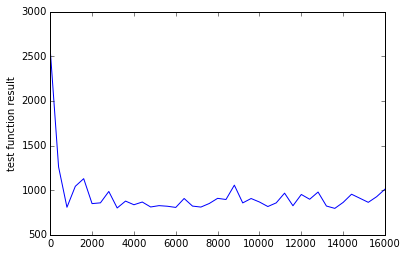

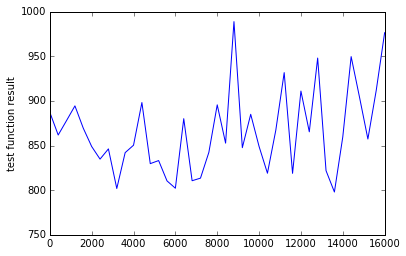

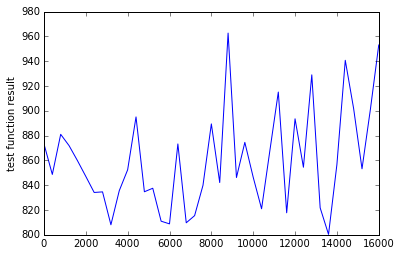

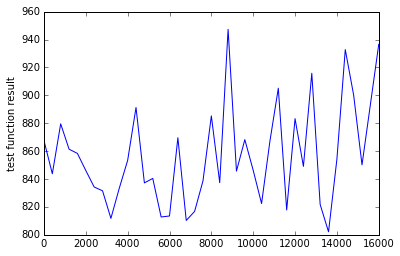

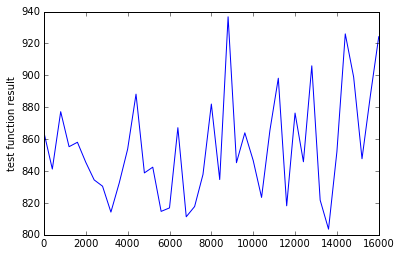

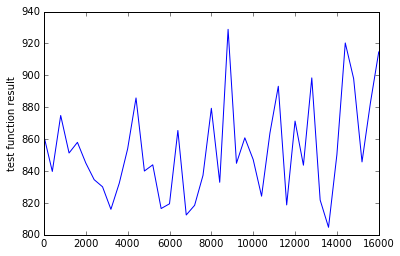

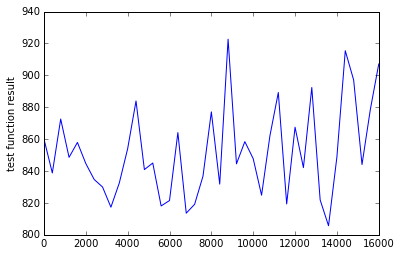

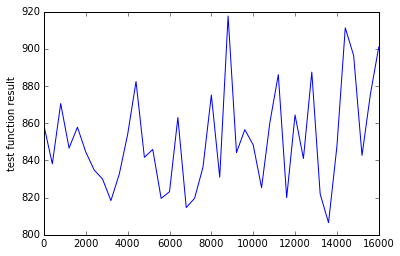

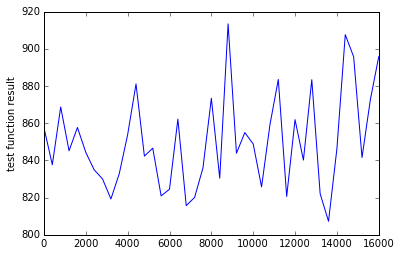

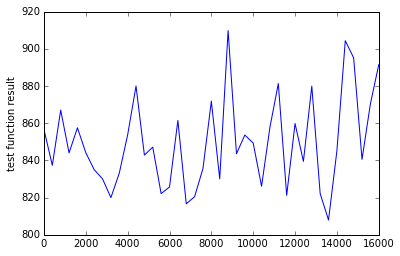

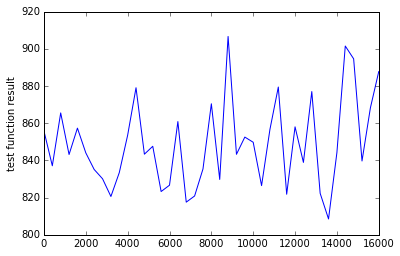

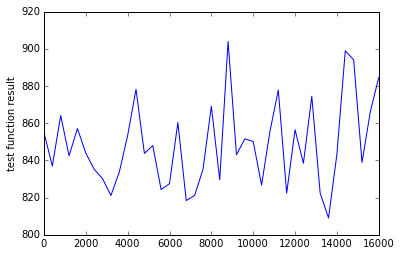

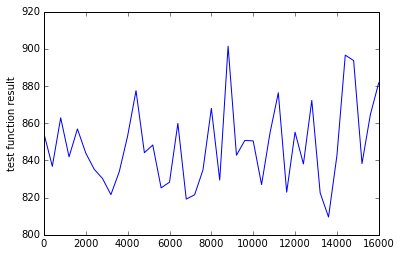

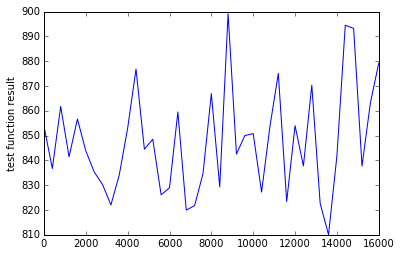

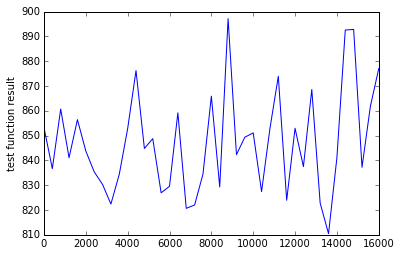

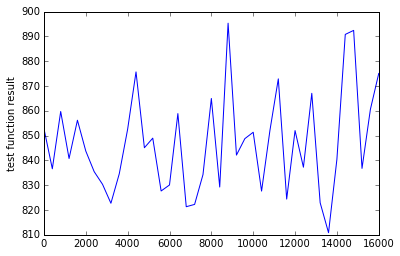

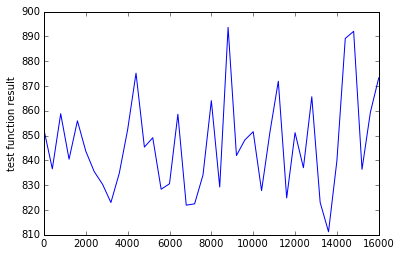

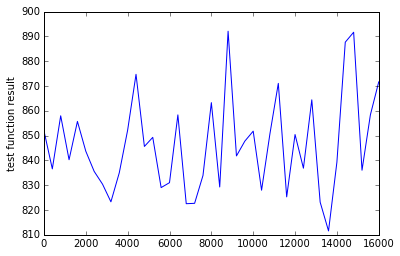

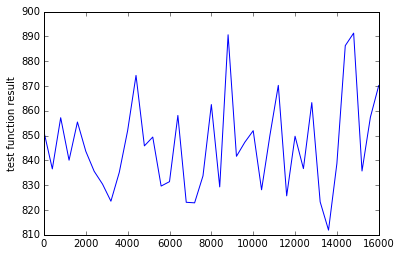

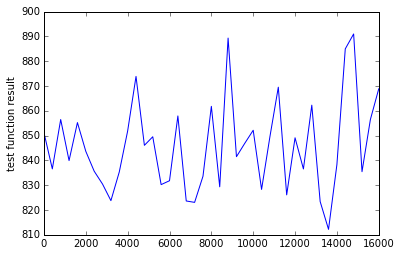

In [10]:
'''
    Implement Oja's rule to find the top k pricipal components of the dataset
'''

# initialize v0 as a vector drawn uniformly at raondom on the surface of a d-dimensional sphere
d = len(data_set_done[0])
v1 = []
prev_v = [] # record the previous v1 to test convergence
s = 0.0
t = len(data_set_done) # t is the data set lenght: how many data points there are
learning_rate = 1.0
# random intialize a vector from a d-dim sphere
for i in range(0,d):
    tmp = np.random.random()
    s = s + tmp**2
    v1.append(tmp)
    prev_v.append(0.0)

s = math.sqrt(s)
# normalize v1 
for i in range(0,d):
    v1[i] = v1[i] * 1.0/ s

a = np.dot(np.array([data_set_done[0]]),np.transpose(np.array([data_set_done[0]])))

dis = 0.0
loop = 0.0
# test convergence
v1 = np.array([v1]) # v1 type np.array([[x1,x2]]) 
v1 = np.transpose(v1) # let v1 becomese a column major vector
prev_v = v1
testResult = []
tPoint = []

# stil have the infinite problem, need to normalize feature
while True:
    testResult = []
    tPoint = []
    #print "loop is ", loop
    for i in range(0, len(data_set_done)/2):
        loop = loop + 1
        learning_rate = 1.0/math.sqrt(loop)
        tmp = data_set_done[i] # convert to right form
        tmp = np.array([tmp])
        b = np.dot(np.transpose(tmp),tmp)
        b = np.dot(b,v1) # result will be a 110 * 1 vector
        v1 = v1 + learning_rate * b 
        v1 = normalizeVector(v1)
        if i % 400 == 0:
            tPoint.append(i)
            test = testFunction(v1)
            testResult.append(test)
    plt.plot(tPoint, testResult, '-')
    #plt.axhline(baseline, color='r')
    plt.ylabel('test function result')
    plt.show()
    dis = distance(prev_v,v1)
    if dis <= 0.001:
            break
    prev_v = v1

In [ ]:
'''
    Make a function, passing k and dataset, return k number of eigenvectors 
'''
def sgd_oja(k,dataset):
    v__results = [] # remember all the Vs get from oja's rule
    
    # for k eigenvectors 
    for num_of_eigen in range(0,k):
        # initialize v0 as a vector drawn uniformly at raondom on the surface of a d-dimensional sphere
        d = len(dataset[0])
        # v1 = []
        v = []
        prev_v = [] # record the previous v1 to test convergence
        s = 0.0
        t = len(dataset) # t is the data set lenght: how many data points there are
        learning_rate = 1.0
    
        # random intialize a vector from a d-dim sphere
        for i in range(0,d):
            tmp = np.random.random()
            s = s + tmp**2
            v.append(tmp)
            prev_v.append(0.0)
    
        # normalize v1 
        s = math.sqrt(s)
        for i in range(0,d):
            v[i] = v[i] * 1.0/ s

        #a = np.dot(np.array([data_set_done[0]]),np.transpose(np.array([data_set_done[0]])))

        dis = 0.0
        loop = 0.0
        # test convergence
        v = np.array([v]) # v1 type np.array([[x1,x2]]) 
        v = np.transpose(v) # let v1 becomese a column major vector
        prev_v = v
        testResult = []
        tPoint = []
        
        projection = [] # get the right projection to use in the loop
        # need to change dataset when num_of_eigen > 1
        if num_of_eigen > 0:
            for i in range(0,len(v_results)):
                for j in range(0,len(dataset)):
                    projection.append(np.array(dataset[j]) - np.dot(v_results[i].reshape(1,110)[0], dataset[j]) * v_results[i].reshape(1,110)-np.dot(v_results[i].reshape(1,110)[0], dataset[j]) * v_results[i].reshape(1,110))
    
        # random shuffle the dataset
        np.random.shuffle(data_set_done)
 
    while True:
        testResult = []
        tPoint = []
        # half of the dataset
        for i in range(0, len(data_set_done)/2):
            loop = loop + 1
            learning_rate = 1.0/math.sqrt(loop)
            tmp = data_set_done[i] # convert to right form
            tmp = np.array([tmp])
            b = np.dot(np.transpose(tmp),tmp)
            b = np.dot(b,v1) # result will be a 110 * 1 vector
            v1 = v1 + learning_rate * b 
            v1 = normalizeVector(v1)
            if i % 400 == 0:
                tPoint.append(i)
                test = testFunction(v1)
                testResult.append(test)
        plt.plot(tPoint, testResult, '-')
        #plt.axhline(baseline, color='r')
        plt.ylabel('test function result')
        plt.show()
        dis = distance(prev_v,v1)
        if dis <= 0.001:
            break
        prev_v = v1

In [11]:
print v1

[[  1.87906042e-001]
 [  1.61111152e-002]
 [  2.19199361e-002]
 [  3.26953157e-001]
 [  1.43008789e-002]
 [  2.46316114e-002]
 [  1.30144731e-002]
 [  2.21680965e-002]
 [  2.80604957e-010]
 [  2.83512914e-030]
 [  5.49351575e-002]
 [  7.43814908e-002]
 [  1.61985567e-001]
 [  1.69655365e-002]
 [  2.33131687e-002]
 [  4.56780876e-003]
 [  8.25786414e-002]
 [  1.51983402e-002]
 [  2.20933533e-002]
 [  2.88721200e-003]
 [  4.41465614e-003]
 [  1.21691287e-002]
 [  4.49887701e-003]
 [  1.35116070e-002]
 [  7.99094307e-005]
 [  3.14160685e-012]
 [  4.53970835e-004]
 [  2.81692698e-001]
 [  1.48172074e-001]
 [  2.06399654e-001]
 [  5.94729023e-002]
 [  4.14770740e-003]
 [  8.75445912e-003]
 [  2.90839297e-006]
 [  1.21495630e-002]
 [  4.89136428e-002]
 [  4.82707194e-002]
 [  1.98831327e-002]
 [  6.52568475e-002]
 [  3.36335994e-002]
 [  5.62508944e-002]
 [  5.96126823e-002]
 [  2.26304435e-002]
 [  1.57231578e-002]
 [  3.09106809e-002]
 [  9.38816722e-003]
 [  1.30144731e-002]
 [  1.2514219

In [12]:
d = np.diag(v1[:,0])
print d

[[  1.87906042e-001   0.00000000e+000   0.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   1.61111152e-002   0.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   2.19199361e-002 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 ..., 
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    2.47032823e-323   0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    0.00000000e+000   3.37855130e-001   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   1.01244138e-001]]


In [13]:
d = 1000 * d

In [14]:
b = [0]*110
b = np.transpose(b)
print b.shape

(110,)


In [116]:
# now we computed v1, we want to compute v2, and then up to v_k
'''
    solve the linear equation
    dot product equals to zero means they are perpendicular
'''
print b.shape
v2 = np.linalg.solve(d,b)
print v2

(110, 1)
[[        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 

In [8]:
mu, sigma = 0.5, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 500)
print s
print(random.choice(s))

[ 0.52434065  0.41056886  0.48039035  0.50673934  0.34519173  0.45819256
  0.56696211  0.64737547  0.50466533  0.50523625  0.35646388  0.47693438
  0.51604804  0.51775477  0.71228099  0.45048873  0.25192387  0.50980572
  0.65074071  0.61594095  0.46898096  0.57494509  0.24478015  0.54780164
  0.3619135   0.48160303  0.45330064  0.42160922  0.3218822   0.54190317
  0.63223099  0.5015231   0.42649825  0.35476978  0.36882823  0.38470195
  0.36626527  0.59102606  0.49825022  0.45718742  0.35235698  0.37440834
  0.44309708  0.430631    0.42037541  0.4999218   0.44091159  0.66989368
  0.47945096  0.64992825  0.56359379  0.47148886  0.54384452  0.33584975
  0.42183947  0.43162351  0.47813186  0.30426626  0.77267612  0.4635078
  0.62552018  0.62334249  0.61107331  0.39335159  0.44303317  0.42162022
  0.36648135  0.47188124  0.37280721  0.48775339  0.56281559  0.5209421
  0.49799115  0.48986665  0.52124714  0.43353275  0.4012482   0.25848857
  0.46204883  0.377445    0.51397083  0.54580619  0.5

In [35]:
# privacry version of oja's rule

# generate gamma distribution

d = len(data_set_done[0])
print "d is ", d


# Z first need to draw from a circle, and then normalized, then times the gamma generated
# do this for every data point
def generate_z(privacy_param):
    z = []
    dis = 0
    # normal distribution with mean 0 std 1
    normal_distribution = np.random.normal(0,1,500)
    for i in range(0,d):
        p = random.choice(normal_distribution) # random select a point from the norm distribution
        dis = dis + p**2
        z.append(p)

    dis = math.sqrt(dis)
    # normalize z 
    for i in range(0,d):
        z[i] = z[i] * 1.0/ dis
    
    z = np.array(z) # convert to a numpy array
    
    # times the sigma distribution
    # specify k and theta
    # theta should be 1/apislong the privacy parameter
    shape, scale = d, 1/privacy_param # mean and dispersion
    # gamma distrubition of k=d, theta = 1 with size 1000
    g = np.random.gamma(shape, scale, 1)
    z = g * z # for every element in z times the gamma parameter

    return z

d is  110


In [54]:
# privacy dataset with privacy parameter of 1

data_set_privacy = []
#for i in range(0,1):
for i in range(0,len(data_set_done)):
    # generate a noise 
    tmp = generate_z(1)
    data_set_privacy.append(np.array(data_set_done[i]).reshape(110,1)+ tmp.reshape(110,1))

In [58]:
print len(data_set_privacy)

32561


In [78]:
# write to new data 1 
f = open('privacy_1', 'w')
for vector in data_set_privacy:
    for num in vector:
        f.write(str(num[0])+" ")
    f.write("\n")
f.close()
print "writing data set done"

writing data set done


In [64]:
def testFunction_privacy(v):
    total = 0.0
    # loop through every data points
    for item in data_set_privacy:
        #tmp = np.array([item])
        tmp = np.transpose(item)
        #print "v1 shape", v.shape
        #print "tmp shape ", tmp.shape
        dotProduct = np.dot(tmp,v) # dotproduct should be a constant
        #print "dotProduct is ", dotProduct
        dotProduct = dotProduct * v # dotproduct is a column major vector
        #print "dotProduct is ", dotProduct
        total = total + distance(tmp,dotProduct)**2
    return total

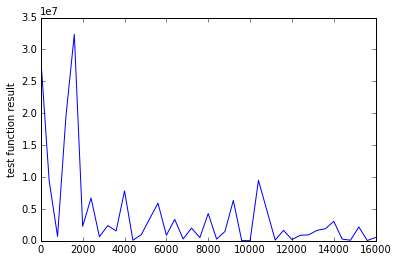

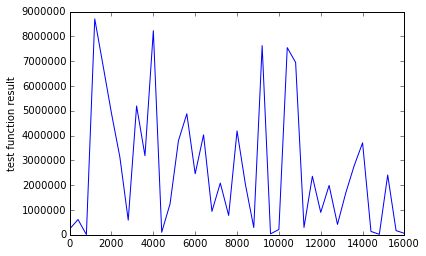

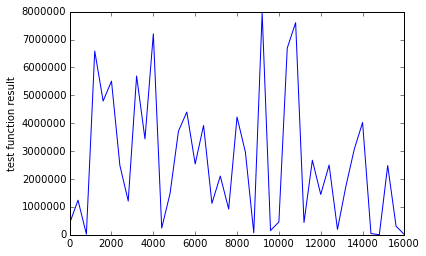

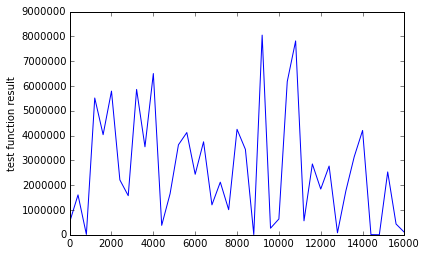

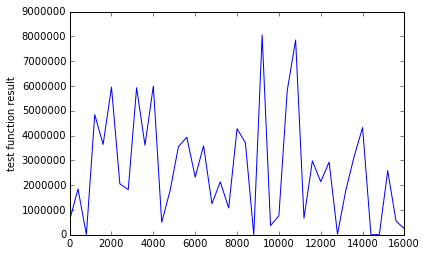

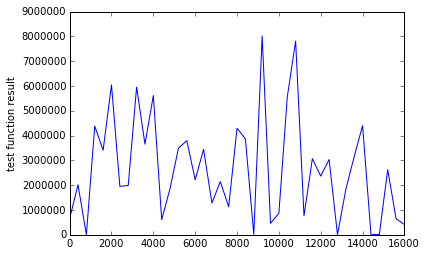

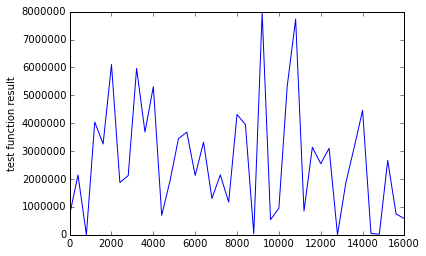

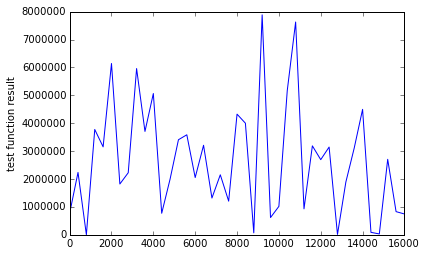

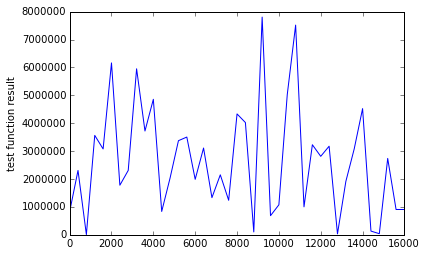

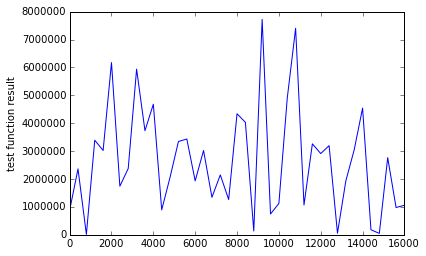

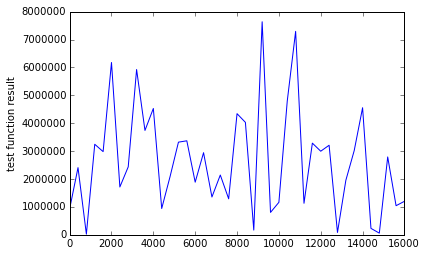

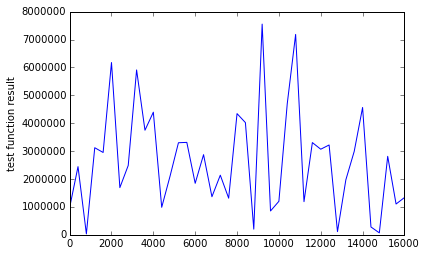

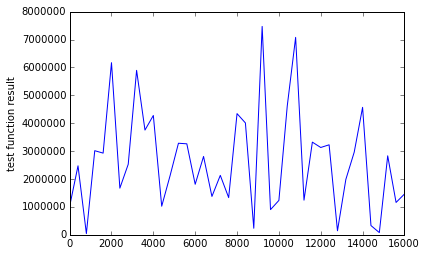

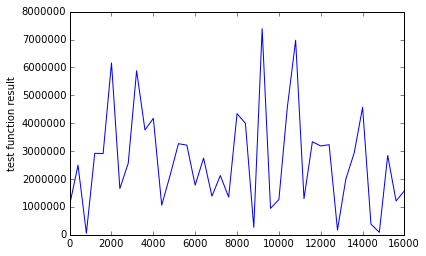

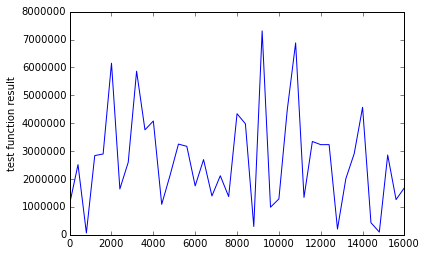

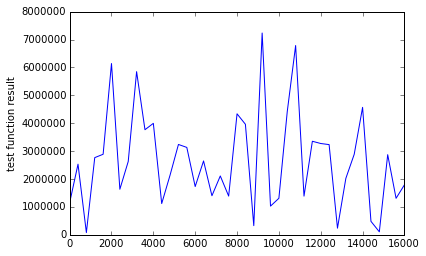

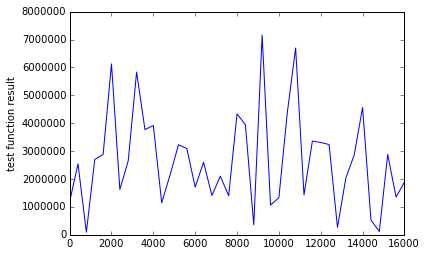

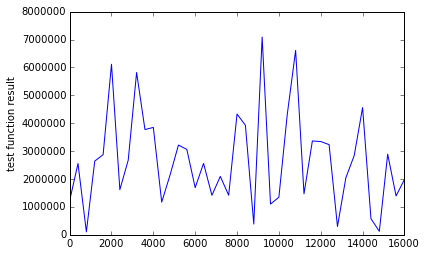

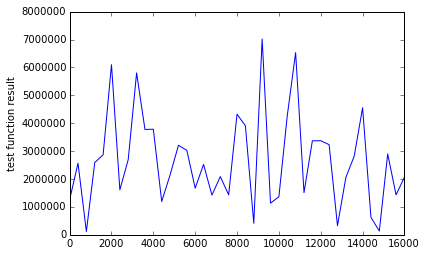

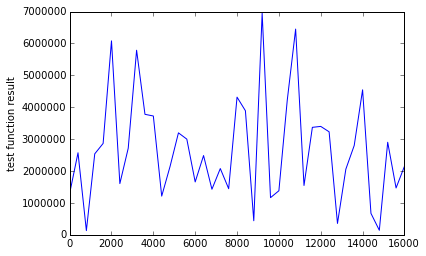

In [65]:
# initialize v0 as a vector drawn uniformly at raondom on the surface of a d-dimensional sphere
d = len(data_set_privacy[0])
v1 = []
prev_v = [] # record the previous v1 to test convergence
s = 0.0
t = len(data_set_privacy) # t is the data set lenght: how many data points there are
learning_rate = 1.0
# random intialize a vector from a d-dim sphere
for i in range(0,d):
    tmp = np.random.random()
    s = s + tmp**2
    v1.append(tmp)
    prev_v.append(0.0)

s = math.sqrt(s)
# normalize v1 
for i in range(0,d):
    v1[i] = v1[i] * 1.0/ s

a = np.dot(np.array([data_set_done[0]]),np.transpose(np.array([data_set_done[0]])))

dis = 0.0
loop = 0.0
# test convergence
v1 = np.array([v1]) # v1 type np.array([[x1,x2]]) 
v1 = np.transpose(v1) # let v1 becomese a column major vector
prev_v = v1
testResult = []
tPoint = []

# stil have the infinite problem, need to normalize feature
while True:
    testResult = []
    tPoint = []
    #print "loop is ", loop
    for i in range(0, len(data_set_privacy)/2):
        loop = loop + 1
        learning_rate = 1.0/math.sqrt(loop)
        tmp = data_set_done[i] # convert to right form
        tmp = np.array([tmp])
        b = np.dot(np.transpose(tmp),tmp)
        b = np.dot(b,v1) # result will be a 110 * 1 vector
        v1 = v1 + learning_rate * b 
        v1 = normalizeVector(v1)
        if i % 400 == 0:
            tPoint.append(i)
            test = testFunction_privacy(v1)
            testResult.append(test)
    plt.plot(tPoint, testResult, '-')
    #plt.axhline(baseline, color='r')
    plt.ylabel('test function result')
    plt.show()
    dis = distance(prev_v,v1)
    if dis <= 0.001:
            break
    prev_v = v1

In [71]:
'''
    Calculate convarience matrix M privacy version
    M is size 110 * 110
'''

N = len(data_set_privacy)
M = data_set_privacy[0] * np.transpose(np.array(data_set_privacy[0]))

for i in range(1, len(data_set_privacy)):
    M = M + ([data_set_privacy[i]]* np.transpose([data_set_privacy[i]]))
print "N is ", N 
print "M is "
print M
print "M shape should be 110 * 110: ",M.shape

# divide M by N accroding to the formula on the notes
M_new = np.divide(M, N)
print M_new
print "M_new shape should be 110 * 110 ", M_new.shape

N is  32561
M is 
[[[  2.71216787e+08   2.71219058e+08   2.71217480e+08 ...,   2.71219361e+08
     2.71218851e+08   2.71216801e+08]
  [  4.38458994e+08   4.38461886e+08   4.38459876e+08 ...,   4.38462272e+08
     4.38461622e+08   4.38459011e+08]
  [  3.17546681e+08   3.17549141e+08   3.17547431e+08 ...,   3.17549469e+08
     3.17548916e+08   3.17546696e+08]
  ..., 
  [  4.63675540e+08   4.63678515e+08   4.63676447e+08 ...,   4.63678912e+08
     4.63678244e+08   4.63675558e+08]
  [  4.19368020e+08   4.19370855e+08   4.19368885e+08 ...,   4.19371234e+08
     4.19370596e+08   4.19368037e+08]
  [  2.72406165e+08   2.72408439e+08   2.72406859e+08 ...,   2.72408743e+08
     2.72408232e+08   2.72406179e+08]]]
M shape should be 110 * 110:  (1, 110, 110)
[[[  8329.49809502   8329.56782751   8329.51936606 ...,   8329.57714209
     8329.56146614   8329.49852454]
  [ 13465.7717365   13465.86055924  13465.79883079 ...,  13465.87242381
    13465.85245636  13465.7722836 ]
  [  9752.36265818   9752.43

In [72]:
'''
    baseline: SVD result
'''
U, s, V = np.linalg.svd(M_new, full_matrices=True)
print "U, ", U
print "s, ", s
print "V, ", V

U,  [[[ -6.33522939e-02   1.57871423e-01   9.47252594e-01 ...,  -6.73219773e-03
     3.46065727e-03  -2.69718963e-01]
  [ -1.02417498e-01  -2.28392907e-02   2.54853959e-02 ...,  -2.61731452e-01
    -1.03449880e-02   9.52376483e-02]
  [ -7.41742468e-02   1.14030207e-01  -5.96510525e-02 ...,   1.51868844e-02
    -3.52880475e-02  -1.19795963e-01]
  ..., 
  [ -1.08307693e-01  -5.39058529e-02  -1.67992971e-02 ...,   3.26703315e-02
    -8.54924757e-02  -9.73317515e-02]
  [ -9.79581433e-02   2.87913878e-03  -3.66588973e-02 ...,   5.96187047e-02
    -2.47371824e-02  -9.36443637e-02]
  [ -6.36301141e-02   1.56374862e-01  -3.12952795e-02 ...,   1.50003816e-02
    -3.81300811e-02   1.37960020e-04]]]
s,  [[  1.37897262e+06   3.94809506e-01   2.37003268e-10   1.52399240e-10
    1.52399240e-10   1.52399240e-10   1.52399240e-10   1.52399240e-10
    1.52399240e-10   1.52399240e-10   1.52399240e-10   1.52399240e-10
    1.52399240e-10   1.52399240e-10   1.52399240e-10   1.52399240e-10
    1.52399240e-10

In [74]:
# use the first column of U returned by np.linalg.svd
print np.transpose(np.array([U[:,0]]))
print "baseline result is ", testFunction_privacy(np.transpose(np.array([U[:,0]])))

 [[[ -6.33522939e-02]]

 [[  1.57871423e-01]]

 [[  9.47252594e-01]]

 [[  1.52795608e-04]]

 [[ -4.83816269e-03]]

 [[  7.69698247e-04]]

 [[ -2.56881005e-03]]

 [[ -2.83262748e-03]]

 [[  3.02286365e-03]]

 [[ -4.56611241e-03]]

 [[  3.93584054e-03]]

 [[  4.45995856e-04]]

 [[  2.34601414e-04]]

 [[ -2.28745301e-03]]

 [[  1.03907564e-03]]

 [[ -2.03723883e-03]]

 [[  1.53894373e-03]]

 [[  1.93610419e-03]]

 [[ -1.21989554e-03]]

 [[ -2.68008384e-03]]

 [[  6.26181934e-03]]

 [[ -4.53394207e-03]]

 [[ -2.67408126e-03]]

 [[  9.15573958e-04]]

 [[ -5.02283399e-03]]

 [[ -9.60014694e-04]]

 [[  1.96998847e-03]]

 [[  2.12185873e-04]]

 [[  1.42233800e-03]]

 [[ -1.52690319e-03]]

 [[  3.15705474e-03]]

 [[  3.33146104e-03]]

 [[  5.58060040e-04]]

 [[  2.88113948e-03]]

 [[ -7.99108932e-03]]

 [[ -5.87625287e-03]]

 [[ -1.28852527e-03]]

 [[  7.21747968e-05]]

 [[  2.45319643e-04]]

 [[  1.11708154e-03]]

 [[ -9.25186762e-04]]

 [[  4.54016658e-03]]

 [[ -3.44599185e-04]]

 [[  3.905

ValueError: shapes (1,110) and (110,1,1) not aligned: 110 (dim 1) != 1 (dim 1)